# **Project Name**    - Iris Flower Classification



# **Problem Statement**


The iris flower, scientifically known as Iris, is a distinctive genus of flowering plants. Within this genus, there are three primary species: Iris setosa, Iris versicolor, and Iris virginica. These species exhibit variations in their physical characteristics, particularly in the measurements of their sepal length, sepal width, petal length, and petal width.

## ***1. Dataset Overview***

In [99]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [101]:
# Load Dataset
df = pd.read_csv("../Downloads/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [103]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [105]:
df.count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [107]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Duplicate Values

In [110]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values

In [113]:
# Missing Values/Null Values Count
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## ***2. Understanding The Variables***

### Check Unique Values for each variable.

In [117]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


## ***3. Data Vizualization***

#### Chart - 1 : Distribution of Numerical Variables

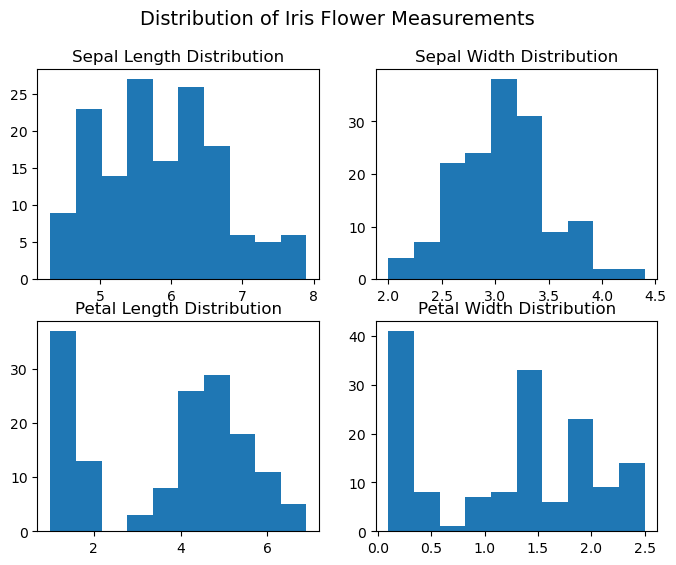

In [121]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1
plt.hist(df['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2
plt.hist(df['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3
plt.hist(df['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4
plt.hist(df['PetalWidthCm'])
plt.title('Petal Width Distribution')

plt.show()

#### Chart - 2 : Correlation Heatmap

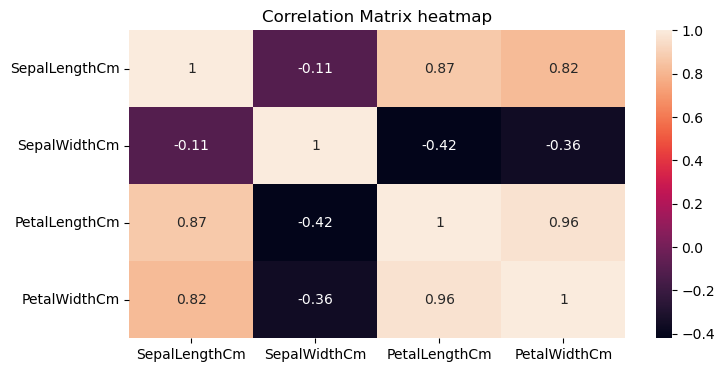

In [124]:
corr_matrix = corr_matrix = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True)

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [128]:
# Encode the categorical columns
# Create a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode the 'species' column to convert the species names to numerical labels
df['species'] = le.fit_transform(df['Species'])

# Check the unique values in the 'species' column after encoding
unique_species = df['species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


### 2. Data Scaling

In [131]:
# Defining the X and y
x = df.drop(columns = "Species")
y = df["Species"]


### 3. Data Splitting

In [134]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.8)

In [136]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Species
Iris-virginica     43
Iris-setosa        39
Iris-versicolor    38
Name: count, dtype: int64

In [138]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
20,21,5.4,3.4,1.7,0.2,0
7,8,5.0,3.4,1.5,0.2,0
59,60,5.2,2.7,3.9,1.4,1
23,24,5.1,3.3,1.7,0.5,0
62,63,6.0,2.2,4.0,1.0,1
...,...,...,...,...,...,...
28,29,5.2,3.4,1.4,0.2,0
42,43,4.4,3.2,1.3,0.2,0
33,34,5.5,4.2,1.4,0.2,0
96,97,5.7,2.9,4.2,1.3,1


In [140]:
x_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
45,46,4.8,3.0,1.4,0.3,0
1,2,4.9,3.0,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
34,35,4.9,3.1,1.5,0.1,0
55,56,5.7,2.8,4.5,1.3,1
139,140,6.9,3.1,5.4,2.1,2
70,71,5.9,3.2,4.8,1.8,1
58,59,6.6,2.9,4.6,1.3,1
117,118,7.7,3.8,6.7,2.2,2
98,99,5.1,2.5,3.0,1.1,1


In [142]:
y_train

20        Iris-setosa
7         Iris-setosa
59    Iris-versicolor
23        Iris-setosa
62    Iris-versicolor
           ...       
28        Iris-setosa
42        Iris-setosa
33        Iris-setosa
96    Iris-versicolor
64    Iris-versicolor
Name: Species, Length: 120, dtype: object

In [144]:
y_test

45         Iris-setosa
1          Iris-setosa
5          Iris-setosa
34         Iris-setosa
55     Iris-versicolor
139     Iris-virginica
70     Iris-versicolor
58     Iris-versicolor
117     Iris-virginica
98     Iris-versicolor
75     Iris-versicolor
81     Iris-versicolor
2          Iris-setosa
103     Iris-virginica
56     Iris-versicolor
124     Iris-virginica
46         Iris-setosa
21         Iris-setosa
10         Iris-setosa
141     Iris-virginica
44         Iris-setosa
132     Iris-virginica
66     Iris-versicolor
27         Iris-setosa
91     Iris-versicolor
136     Iris-virginica
92     Iris-versicolor
88     Iris-versicolor
26         Iris-setosa
52     Iris-versicolor
Name: Species, dtype: object

## ***6. ML Model Implementation***

### ML Model - 1 : Logistic regression

In [148]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(x_train, y_train)

LogisticRegression()

Accuracy of the Logistic Regression model :  1.0


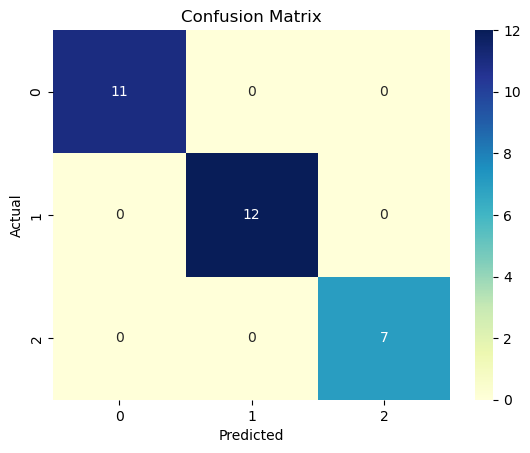

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [150]:
y_pred = model1.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model : ", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

### ML Model - 2 : Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(random_state=20)
model2.fit(x_train, y_train)

DecisionTreeClassifier(random_state=20)

Accuracy of the Decision Tree Classifier model :  1.0


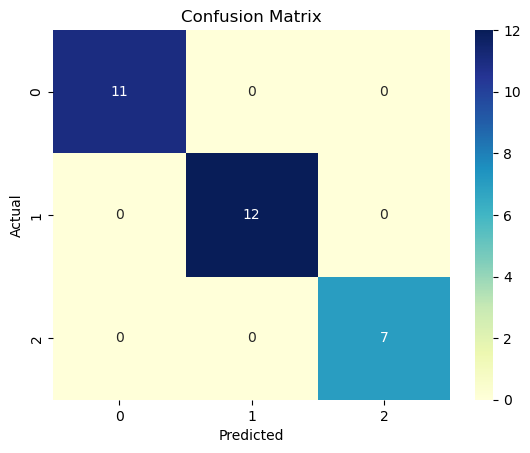

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [155]:
y_pred = model2.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree Classifier model : ", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

### ML Model - 3 : Gaussian Naive Bayes

In [158]:
from sklearn.naive_bayes import GaussianNB

model3 = GaussianNB()
model3.fit(x_train , y_train)

GaussianNB()

Accuracy of Gaussian Naive Bays :  1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



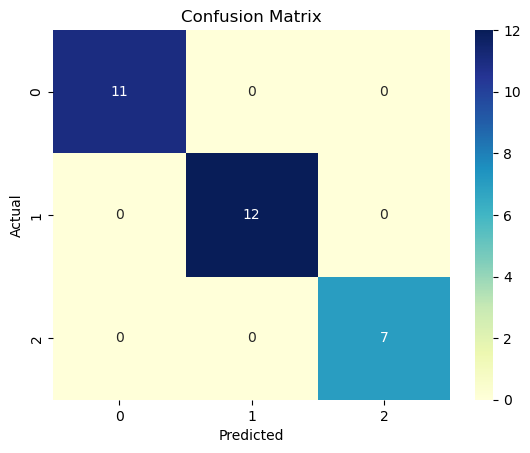

In [160]:
y_pred = model3.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Gaussian Naive Bays : ", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ML Model - 4 : Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(random_state=0)
model4.fit(x_train , y_train)

RandomForestClassifier(random_state=0)

Accuracy of the Random Forest Classifier model :  1.0


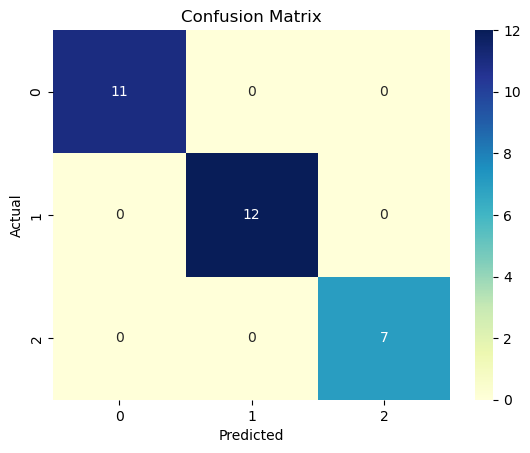

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [165]:
y_pred = model4.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Random Forest Classifier model : ", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

### ML Model - 5 : SVM (Support Vector Machine)

In [168]:
from sklearn.svm import SVC

model5 = SVC(kernel='linear', random_state=0, probability=True)
model5.fit(x_train, y_train)
# Model is trained (fit) and predicted in the evaluate model

SVC(kernel='linear', probability=True, random_state=0)

Accuracy of the Support Vector Machine :  1.0


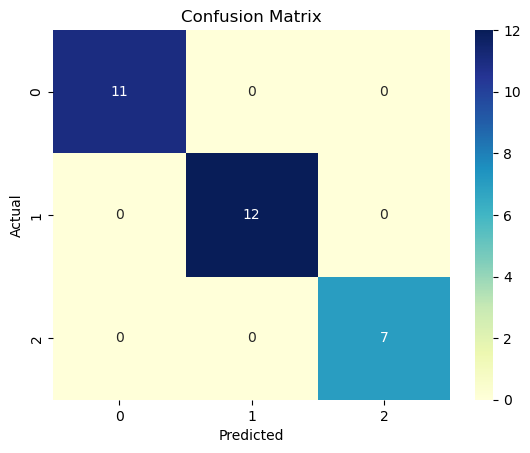

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [170]:
y_pred = model5.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Support Vector Machine : ", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

### ML Model - 6 : Xtreme Gradient Boosting

In [173]:
from xgboost import XGBClassifier

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train the XGBoost classifier
model6 = xgb.XGBClassifier()
model6.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Accuracy of XGB Classifier :  1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



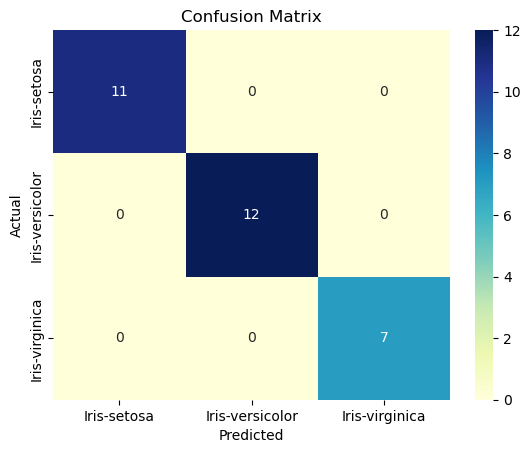

In [175]:
y_pred = model6.predict(x_test)

accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy of XGB Classifier : ", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## ***Selection of best model***

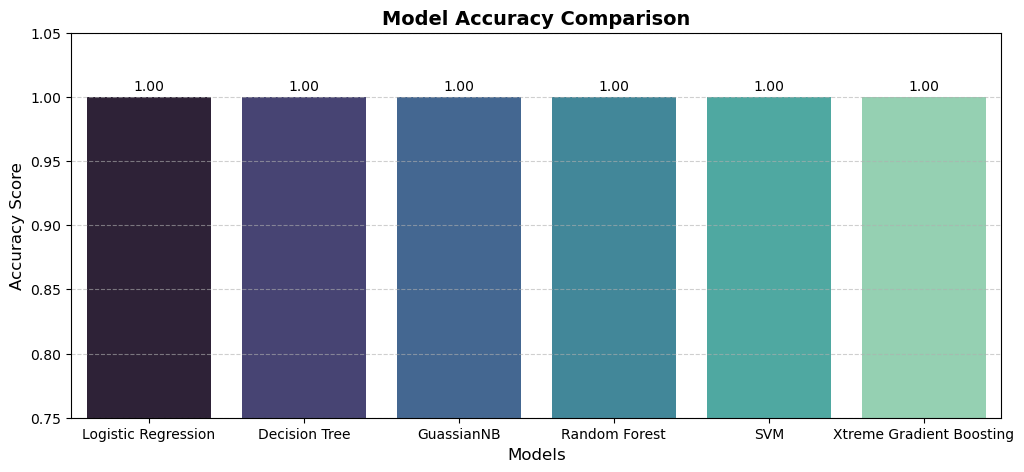

In [178]:
model_names = ['Logistic Regression', 'Decision Tree', 'GuassianNB', 'Random Forest', 'SVM', 'Xtreme Gradient Boosting']
accuracy_scores = [1.0, 1.0, 1.0, 1.0 ,1.0, 1.0]
plt.figure(figsize=(12, 5))
sns.barplot(x=model_names, y=accuracy_scores, palette="mako")
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14, fontweight="bold")
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha="center", fontsize=10)
plt.ylim(0.75, 1.05)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [180]:
from sklearn.metrics import accuracy_score

# Dictionary of models
models = {
    "Logistic Regression": model1,
    "Decision Tree": model2,
    "Naive bayes GuassianNB": model3,
    "Random Forest": model4,
    "SVM": model5,
    "XGBoost": model6,
}

# Iterate through models
for name, model in models.items():
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"Model: {name}")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Testing Accuracy : {test_acc:.4f}\n")

Model: Logistic Regression
  Training Accuracy: 1.0000
  Testing Accuracy : 1.0000

Model: Decision Tree
  Training Accuracy: 1.0000
  Testing Accuracy : 1.0000

Model: Naive bayes GuassianNB
  Training Accuracy: 1.0000
  Testing Accuracy : 1.0000

Model: Random Forest
  Training Accuracy: 1.0000
  Testing Accuracy : 1.0000

Model: SVM
  Training Accuracy: 1.0000
  Testing Accuracy : 1.0000

Model: XGBoost
  Training Accuracy: 0.0000
  Testing Accuracy : 0.0000



# **Conclusion**

In the Iris flower classification project, the Random Forest model has been selected as the final prediction model. The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:

1. **Data Exploration:** Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that Iris-Setosa exhibited distinct features compared to the other two species.

2. **Data Preprocessing:** Data preprocessing steps, including handling missing values and encoding categorical variables, were performed to prepare the dataset for modeling.

3. **Model Selection:** After experimenting with various machine learning models, tuned Random Forest was chosen as the final model due to its simplicity, interpretability, and good performance in classifying Iris species.

4. **Model Training and Evaluation:** The Random Forest (tuned) model was trained on the training dataset and evaluated using appropriate metrics. The model demonstrated satisfactory accuracy and precision in classifying Iris species.

5. **Challenges and Future Work:** The project encountered challenges related to feature engineering and model fine-tuning. Future work may involve exploring more advanced modeling techniques to improve classification accuracy further.

6. **Practical Application:** The Iris flower classification model can be applied in real-world scenarios, such as botany and horticulture, to automate the identification of Iris species based on physical characteristics.

In conclusion, the Iris flower classification project successfully employed Random Forest (tuned) as the final prediction model to classify Iris species. The project's outcomes have practical implications in the field of botany and offer valuable insights into feature importance for species differentiation. Further refinements and enhancements may lead to even more accurate and reliable classification models in the future.